## Assigment 2 
Karl-Axel Jönsson BME4

In [59]:
import numpy as np 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

X,y=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The highest accuracy using knn was 0.9578947368421052 with k = 8


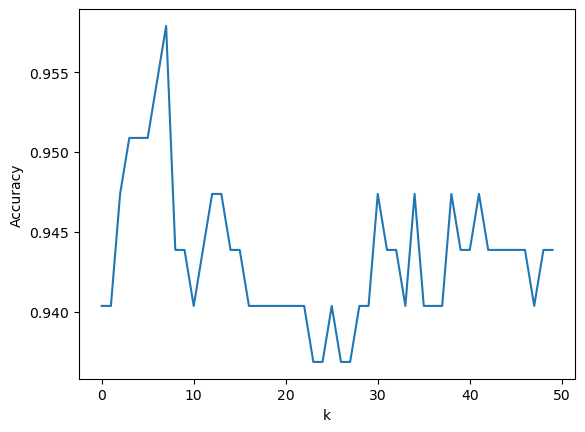

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_list=np.zeros(50)

for i in range(50):
    clf = KNeighborsClassifier(n_neighbors=i+1) 
    clf.fit(X_train,y_train) # Träning 
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test,y_hat)
    acc_list[i]=acc

max_acc=max(acc_list)
max_acc_k=np.where(acc_list==max_acc)[0][0]
k=max_acc_k+1
print("The highest accuracy using knn was", max_acc, "with k =",k)
plt.plot(acc_list)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


The highest accuracy for the Decision Tree was 0.9368421052631579 with max depth = 3


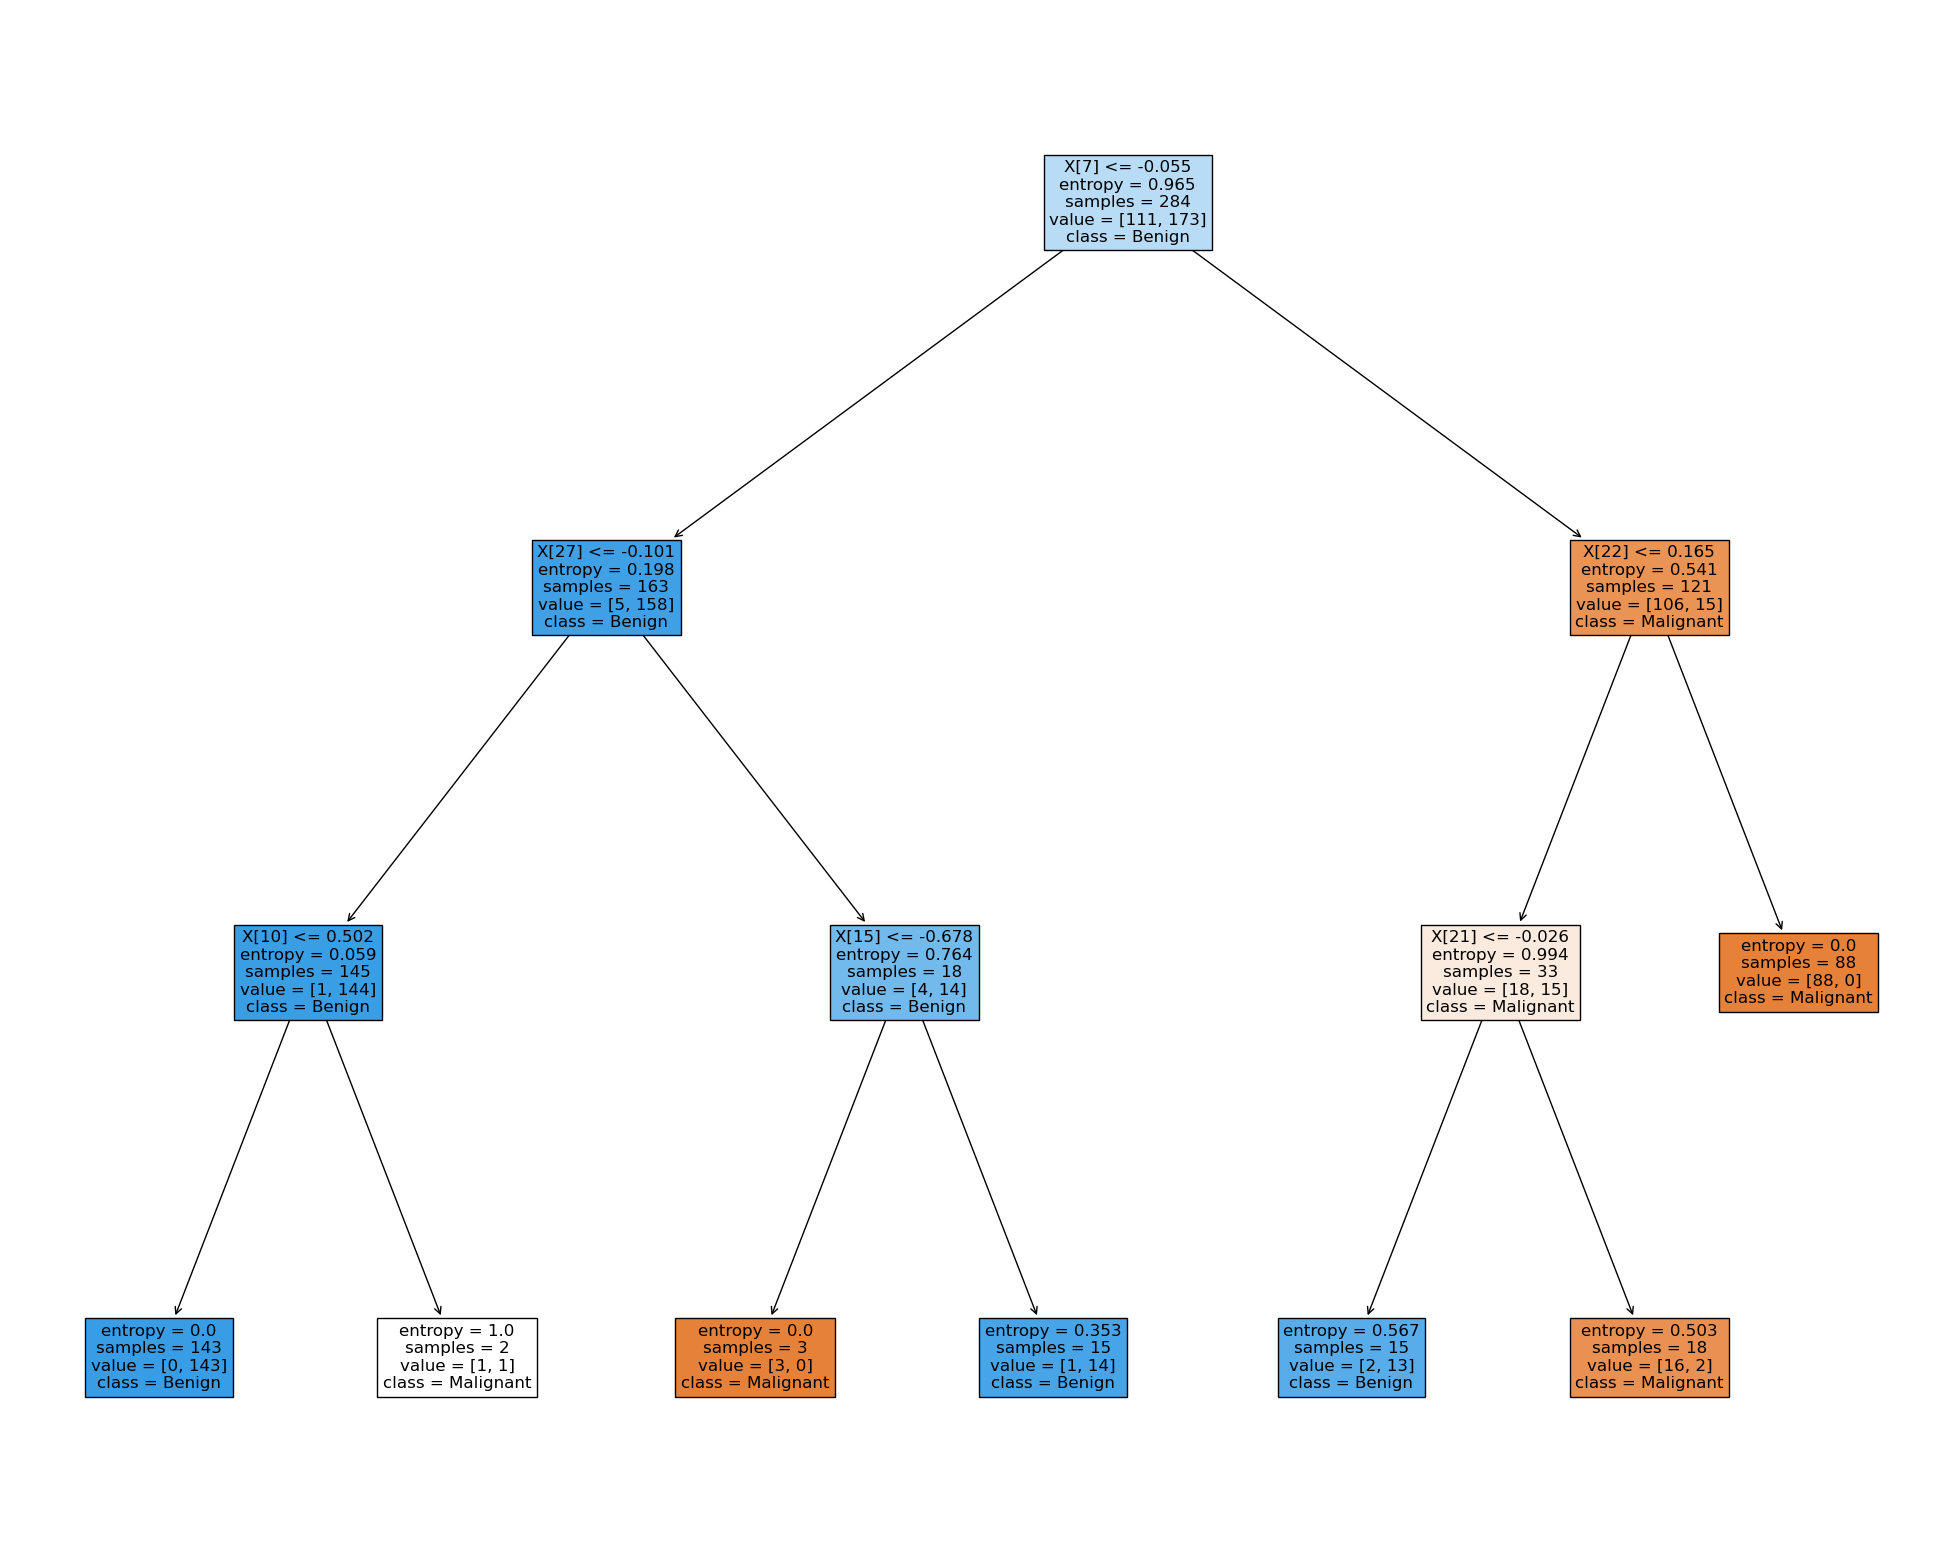

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

acc_list=np.zeros(4)
for i in range(4):
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i+1)
    clf.fit(X_train,y_train)
    y_hat= clf.predict(X_test)
    acc=accuracy_score(y_test,y_hat)
    acc_list[i]=acc

max_depth=np.where(acc_list==max(acc_list))[0][0]
d=max_depth+1   

clf=DecisionTreeClassifier(criterion='entropy',max_depth=d)
clf.fit(X_train,y_train)


print("The highest accuracy for the Decision Tree was", max(acc_list), "with max depth =", d)
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf, class_names={0: 'Malignant', 1: 'Benign'},filled = True, fontsize=12)
plt.show()